(1) Import and Prepare the Data
===========================

In [33]:
#imports
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

In [34]:
#define database connection
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [35]:
#dataframe
credit = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\higgi\.conda\envs\Course2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [36]:
credit.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


Pandas Profiling
----------------

In [37]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling Inferences

1.  There are no missing values
2.  Cleanup on headers is needed
    a.  Correct headers are in the second row
    b.  PAY_0 should be renamed to PAY_1
3.  There are 1273 duplicate rows
4.  Limit Bal is related to payment amounts
5.  Monthly payment statuses are correlated
6.  Monthly bill amounts are correlated

Further Cleansing and Preparation
---------------------------------

In [38]:
#drop any duplicate records
credit = credit.drop_duplicates()

In [39]:
#replace spaces in column names
credit.columns = credit.columns.str.replace(' ', '_')

In [40]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 2397
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      2397 non-null   object
 1   X2      2397 non-null   object
 2   X3      2397 non-null   object
 3   X4      2397 non-null   object
 4   X5      2397 non-null   object
 5   X6      2397 non-null   object
 6   X7      2397 non-null   object
 7   X8      2397 non-null   object
 8   X9      2397 non-null   object
 9   X10     2397 non-null   object
 10  X11     2397 non-null   object
 11  X12     2397 non-null   object
 12  X13     2397 non-null   object
 13  X14     2397 non-null   object
 14  X15     2397 non-null   object
 15  X16     2397 non-null   object
 16  X17     2397 non-null   object
 17  X18     2397 non-null   object
 18  X19     2397 non-null   object
 19  X20     2397 non-null   object
 20  X21     2397 non-null   object
 21  X22     2397 non-null   object
 22  X23     2397 non-null   

Without further cleaning and transformation, all values are object so it's not easy to tell nominal vs numeric amounts.

Data Cleaning and Transformation
--------------------------------

In [41]:
#rename columns based on the current naming convention

#make the first row into column headers
credit = credit.rename(columns=credit.iloc[0]).drop(credit.index[0])

#rename PAY_0 column to PAY_1
credit.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

#remove duplicate headers
credit = credit.loc[credit['LIMIT_BAL'] != 'LIMIT_BAL']

In [42]:
#converting numeric values from object to int
credit.LIMIT_BAL = credit.LIMIT_BAL.astype(int)
credit.AGE = credit.AGE.astype(int)
credit.PAY_1 = credit.PAY_1.astype(int)
credit.PAY_2 = credit.PAY_2.astype(int)
credit.PAY_3 = credit.PAY_3.astype(int)
credit.PAY_4 = credit.PAY_4.astype(int)
credit.PAY_5 = credit.PAY_5.astype(int)
credit.PAY_6 = credit.PAY_6.astype(int)
credit.BILL_AMT1 = credit.BILL_AMT1.astype(int)
credit.BILL_AMT2 = credit.BILL_AMT2.astype(int)
credit.BILL_AMT3 = credit.BILL_AMT3.astype(int)
credit.BILL_AMT4 = credit.BILL_AMT4.astype(int)
credit.BILL_AMT5 = credit.BILL_AMT5.astype(int)
credit.BILL_AMT6 = credit.BILL_AMT6.astype(int)
credit.PAY_AMT1 = credit.PAY_AMT1.astype(int)
credit.PAY_AMT2 = credit.PAY_AMT2.astype(int)
credit.PAY_AMT3 = credit.PAY_AMT3.astype(int)
credit.PAY_AMT4 = credit.PAY_AMT4.astype(int)
credit.PAY_AMT5 = credit.PAY_AMT5.astype(int)
credit.PAY_AMT6 = credit.PAY_AMT6.astype(int)

In [43]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


Dealing with non-numeric data (One-Hot Encoding)
------------------------------------------------

In [44]:
credit.dtypes

LIMIT_BAL                      int32
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int32
PAY_1                          int32
PAY_2                          int32
PAY_3                          int32
PAY_4                          int32
PAY_5                          int32
PAY_6                          int32
BILL_AMT1                      int32
BILL_AMT2                      int32
BILL_AMT3                      int32
BILL_AMT4                      int32
BILL_AMT5                      int32
BILL_AMT6                      int32
PAY_AMT1                       int32
PAY_AMT2                       int32
PAY_AMT3                       int32
PAY_AMT4                       int32
PAY_AMT5                       int32
PAY_AMT6                       int32
default payment next month    object
dtype: object

In [45]:
#get dummies for non-numeric values
credit = pd.get_dummies(credit)

In [46]:
#inspecting head after getting dummies
credit.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month_default,default payment next month_not default
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,1,0,0,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,1,0,0,1,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,1,0,0,1,0,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,1,0,1,0,0,0,1
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,1,0,1,0,0,0,1


In [47]:
#verifying that all columns are now numeric
credit.dtypes

LIMIT_BAL                                 int32
AGE                                       int32
PAY_1                                     int32
PAY_2                                     int32
PAY_3                                     int32
PAY_4                                     int32
PAY_5                                     int32
PAY_6                                     int32
BILL_AMT1                                 int32
BILL_AMT2                                 int32
BILL_AMT3                                 int32
BILL_AMT4                                 int32
BILL_AMT5                                 int32
BILL_AMT6                                 int32
PAY_AMT1                                  int32
PAY_AMT2                                  int32
PAY_AMT3                                  int32
PAY_AMT4                                  int32
PAY_AMT5                                  int32
PAY_AMT6                                  int32
SEX_female                              

(2) Perform Exploratory Data Analysis
===

In [48]:
#additional imports
import matplotlib.pyplot as plt

In [49]:
#what are the headers in the data frame?
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


## Histograms

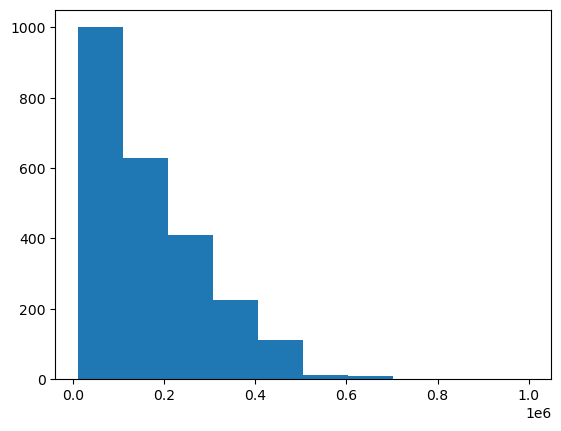

In [50]:
#matplotlib histogram of LIMIT_BAL
plt.hist(credit['LIMIT_BAL'])
plt.show()

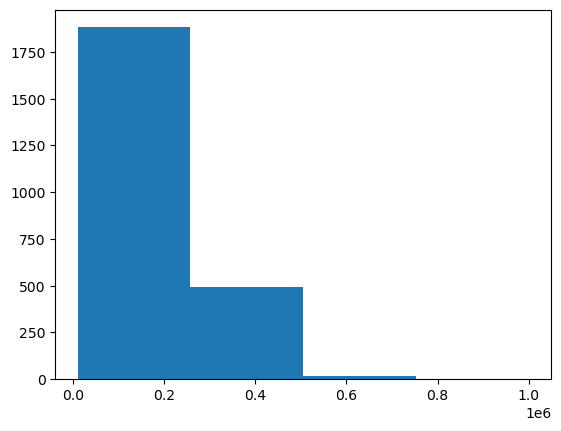

In [51]:
#Set number of bins to 4
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

## Line Plots

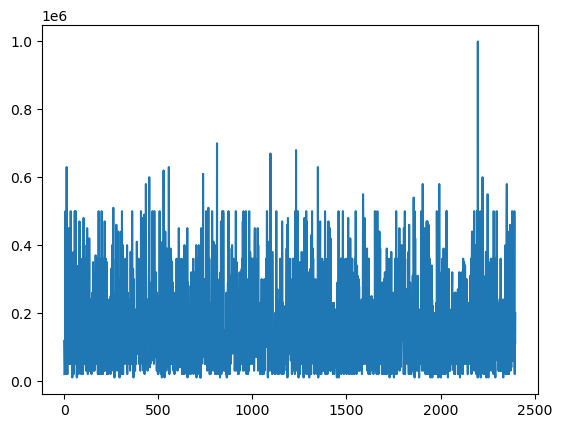

In [52]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

## Scatter Plots

In [53]:
x = credit['PAY_1']
y = credit['PAY_2']

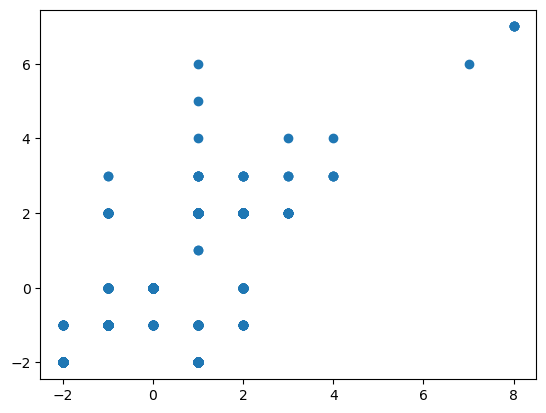

In [54]:
plt.scatter(x,y)
plt.show()

## Box Plots

In [55]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


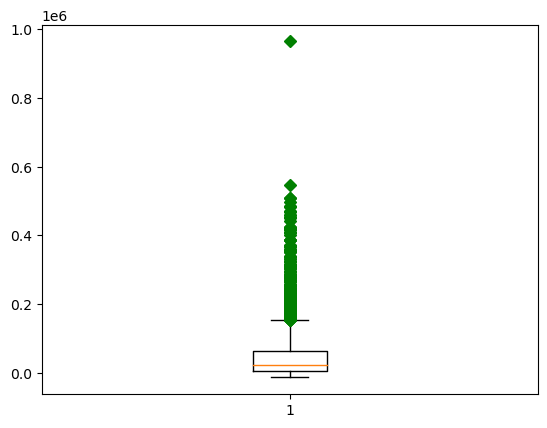

In [56]:
A = credit['BILL_AMT1']
plt.boxplot(A,0, 'gD')
plt.show()

## Correlation

In [57]:
corrMat = credit.corr()
print(corrMat)

                                        LIMIT_BAL       AGE     PAY_1  \
LIMIT_BAL                                1.000000  0.154974 -0.200540   
AGE                                      0.154974  1.000000 -0.017835   
PAY_1                                   -0.200540 -0.017835  1.000000   
PAY_2                                   -0.248233 -0.029903  0.637668   
PAY_3                                   -0.236194 -0.037790  0.547805   
PAY_4                                   -0.224340 -0.024571  0.497509   
PAY_5                                   -0.213442 -0.012634  0.472577   
PAY_6                                   -0.210881 -0.009462  0.445626   
BILL_AMT1                                0.361823  0.068263  0.171638   
BILL_AMT2                                0.361342  0.061591  0.175226   
BILL_AMT3                                0.365711  0.065932  0.173459   
BILL_AMT4                                0.375659  0.058714  0.174051   
BILL_AMT5                                0.365777  

## Covariance

In [58]:
covMat = credit.cov()
print(covMat)

                                           LIMIT_BAL            AGE  \
LIMIT_BAL                               1.676861e+10  189691.134493   
AGE                                     1.896911e+05      89.346812   
PAY_1                                  -2.917502e+04      -0.189402   
PAY_2                                  -3.882758e+04      -0.341421   
PAY_3                                  -3.815289e+04      -0.445582   
PAY_4                                  -3.417397e+04      -0.273211   
PAY_5                                  -3.197111e+04      -0.138139   
PAY_6                                  -3.227379e+04      -0.105708   
BILL_AMT1                               3.648630e+09   50246.908772   
BILL_AMT2                               3.532902e+09   43956.155322   
BILL_AMT3                               3.297613e+09   43395.642119   
BILL_AMT4                               3.313588e+09   37803.951152   
BILL_AMT5                               3.046906e+09   31681.465104   
BILL_A